## Single Layer Perceptron with Stochastic Gradient Descent with K-Cross Validation

In [1]:
#Reading the data set and taking only 2 classes
import pandas as pd 
import numpy as np

data = pd.read_csv('irisdata.csv',header=None)

data = data[data[4] != 'Iris-versicolor']
data[4] = data[4].str.replace('Iris-setosa','1')
data[4] = data[4].str.replace('Iris-virginica','0')
data[4] = data[4].astype('int64')
array_data = np.array(data)

In [2]:
#Initialisations of variables
epoch = 60

alpha = 0.1
theta = np.array([0.2,0.3,0.3,0.2])
bias = 0.3

d_bias = 0
h = 0
array_dtheta = np.empty(4)
total_error = np.zeros(epoch)

total_error_train = np.zeros(epoch)
total_error_val = np.zeros(epoch)

local_error_train = 0
local_error_val = 0

total_error_train1 = np.zeros(epoch)
total_error_val1 = np.zeros(epoch)

total_error_train2 = np.zeros(epoch)
total_error_val2 = np.zeros(epoch)

total_error_train3 = np.zeros(epoch)
total_error_val3 = np.zeros(epoch)

total_error_train4 = np.zeros(epoch)
total_error_val4 = np.zeros(epoch)

total_error_train5 = np.zeros(epoch)
total_error_val5 = np.zeros(epoch)

In [3]:
# from random import seed
# from random import randrange
 
# # Split a dataset into k folds
# def cross_validation_split(dataset, folds=5):
#     dataset_split = list()
#     dataset_copy = list(dataset)
#     fold_size = int(len(dataset) / folds)
#     for i in range(folds):
#         fold = list()
#         while len(fold) < fold_size:
#             index = randrange(len(dataset_copy))
#             fold.append(dataset_copy.pop(index))
#         dataset_split.append(fold)
#     return dataset_split
 
# # test cross validation split
# seed(1)
# dataset = array_data
# folds = cross_validation_split(dataset, 5)
# folds[0]

# def k_fold_cross_validation(X, K, randomise = False):
# 	"""
# 	Generates K (training, validation) pairs from the items in X.

# 	Each pair is a partition of X, where validation is an iterable
# 	of length len(X)/K. So each training iterable is of length (K-1)*len(X)/K.

# 	If randomise is true, a copy of X is shuffled before partitioning,
# 	otherwise its order is preserved in training and validation.
# 	"""
# 	if randomise: from random import shuffle; X=list(X); shuffle(X)
# 	for k in list(range(K)):
# 		training = [x for i, x in enumerate(X) if i % K != k]
# 		validation = [x for i, x in enumerate(X) if i % K == k]
# 		yield training, validation

# X = [i for i in list(range(97))]
# for training, validation in k_fold_cross_validation(X, K=5):
# 	for x in X: assert (x in training) ^ (x in validation), x
# training

In [4]:
# fold1 = pd.DataFrame(folds[0])
# fold2 = pd.DataFrame(folds[1])
# fold3 = pd.DataFrame(folds[2])
# fold4 = pd.DataFrame(folds[3])
# fold5 = pd.DataFrame(folds[4])

# fold1.head()

In [5]:
#Dividing the dataset into k folds
fold_11 = pd.read_csv('irisdata.csv', header=None, nrows=10)
fold_12 = pd.read_csv('irisdata.csv', header=None, skiprows=100, nrows=10)
fold1 = pd.concat([fold_11,fold_12])
fold1[4] = fold1[4].str.replace('Iris-setosa','1')
fold1[4] = fold1[4].str.replace('Iris-virginica','0')
fold1[4] = fold1[4].astype('int64')

fold_21 = pd.read_csv('irisdata.csv', header=None, skiprows=10,nrows=10)
fold_22 = pd.read_csv('irisdata.csv', header=None, skiprows=110, nrows=10)
fold2 = pd.concat([fold_21,fold_22])
fold2[4] = fold2[4].str.replace('Iris-setosa','1')
fold2[4] = fold2[4].str.replace('Iris-virginica','0')
fold2[4] = fold2[4].astype('int64')

fold_31 = pd.read_csv('irisdata.csv', header=None, skiprows=20,nrows=10)
fold_32 = pd.read_csv('irisdata.csv', header=None, skiprows=120, nrows=10)
fold3 = pd.concat([fold_31,fold_32])
fold3[4] = fold3[4].str.replace('Iris-setosa','1')
fold3[4] = fold3[4].str.replace('Iris-virginica','0')
fold3[4] = fold3[4].astype('int64')

fold_41 = pd.read_csv('irisdata.csv', header=None, skiprows=30,nrows=10)
fold_42 = pd.read_csv('irisdata.csv', header=None, skiprows=130, nrows=10)
fold4 = pd.concat([fold_41,fold_42])
fold4[4] = fold4[4].str.replace('Iris-setosa','1')
fold4[4] = fold4[4].str.replace('Iris-virginica','0')
fold4[4] = fold4[4].astype('int64')

fold_51 = pd.read_csv('irisdata.csv', header=None, skiprows=40,nrows=10)
fold_52 = pd.read_csv('irisdata.csv', header=None, skiprows=140, nrows=10)
fold5 = pd.concat([fold_51,fold_52])
fold5[4] = fold5[4].str.replace('Iris-setosa','1')
fold5[4] = fold5[4].str.replace('Iris-virginica','0')
fold5[4] = fold5[4].astype('int64')

In [6]:
#Fold5 as validation
train1 = pd.concat([fold1,fold2,fold3,fold4])
val1 = fold5

#Fold4 as validation
train2 = pd.concat([fold1,fold2,fold3,fold5])
val2 = fold4

#Fold3 as validation
train3 = pd.concat([fold1,fold2,fold4,fold5])
val3 = fold3

#Fold2 as validation
train4 = pd.concat([fold1,fold3,fold4,fold5])
val4 = fold2

#Fold1 as validation
train5 = pd.concat([fold2,fold3,fold4,fold5])
val5 = fold1

In [7]:
#Defining functions
import math as mt

def h(x,theta,bias,n):
    return np.dot(x.iloc[n,:4],np.transpose(theta)) + bias

def sigmoid(h):
    return 1/(1+mt.exp(-h))

def error(data,sigmoid,n):
    return (sigmoid-data.iloc[n,4])**2

def prediction(sigmoid):
    if sigmoid >= 0.5:
        prediction = 1
        return prediction
    else:
        prediction = 0
        return prediction

def d_theta(sigmoid,fact,x_array,i):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid*x_array[i]

def d_bias(sigmoid,fact):
    return 2*(sigmoid-fact)*(1-sigmoid)*sigmoid

def new_theta(theta,alpha,d_theta,i):
    return theta[i]-(alpha*d_theta[i])

def new_bias(bias,alpha,d_bias):
    return bias-(alpha*d_bias)

In [8]:
#Calculations

for n in range(epoch):
    
    """Fold5 as validation"""
    temp1_theta = np.zeros(4)
    temp1_bias = 0
    
    for i in range(len(train1)):

        x_array = np.array(train1.iloc[i,:4]) #x1234

        fact = train1.iloc[i,4]

        h_value = h(train1,theta,bias,i)

        sigmoid_value = sigmoid(h_value)

        error_value = error(train1,sigmoid_value,i)

        local_error_train = local_error_train + error_value
            
        prediction_value = prediction(sigmoid_value)
         
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)

        d_bias_value = d_bias(sigmoid_value,fact)
        
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
        temp1_theta = theta
        
        new_bias_value = new_bias(bias,alpha,d_bias_value)
        bias = new_bias_value
        temp1_bias = bias
        
    total_error_train1[n] = ((local_error_train) / (len(train1)))
    local_error_train = 0
    
    for i in range(len(val1)):
    
        x_array = np.array(val1.iloc[i,:4])
        
        fact = val1.iloc[i,4]
        
        h_value = h(val1,temp1_theta,temp1_bias,i)
        
        sigmoid_value = sigmoid(h_value)
        
        error_value = error(val1,sigmoid_value,i)
        local_error_val = local_error_val + error_value
        
        prediction_value = prediction(sigmoid_value)
        
    total_error_val1[n] = ((local_error_val) / (len(val1)))
    local_error_val = 0
    
    """Fold4 as validation"""
    temp2_theta = np.zeros(4)
    temp2_bias = 0
    
    for i in range(len(train2)):
        
        x_array = np.array(train2.iloc[i,:4])
        fact = train2.iloc[i,4]
        h_value = h(train2,theta,bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(train2,sigmoid_value,i)   
        local_error_train = local_error_train + error_value
        prediction_value = prediction(sigmoid_value)
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
        d_bias_value = d_bias(sigmoid_value,fact)
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
        temp2_theta = theta
        new_bias_value = new_bias(bias,alpha,d_bias_value)
        bias = new_bias_value
        temp2_bias = bias
    total_error_train2[n] = ((local_error_train) / (len(train2)))
    local_error_train = 0
    
    for i in range(len(val2)):
    
        x_array = np.array(val2.iloc[i,:4])
        fact = val2.iloc[i,4]
        h_value = h(val2,temp2_theta,temp2_bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(val2,sigmoid_value,i)
        local_error_val = local_error_val + error_value
        prediction_value = prediction(sigmoid_value)
    
    total_error_val2[n] = ((local_error_val / (len(val2))))
    local_error_val = 0
    
    
    """Fold3 as validation"""
    temp3_theta = np.zeros(4)
    temp3_bias = 0
    
    for i in range(len(train3)):
        
        x_array = np.array(train3.iloc[i,:4])
        fact = train3.iloc[i,4]
        h_value = h(train3,theta,bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(train3,sigmoid_value,i)   
        local_error_train = local_error_train + error_value
        prediction_value = prediction(sigmoid_value)
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
        d_bias_value = d_bias(sigmoid_value,fact)
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
        temp3_theta = theta
        new_bias_value = new_bias(bias,alpha,d_bias_value)
        bias = new_bias_value
        temp3_bias = bias
    total_error_train3[n] = ((local_error_train) / (len(train3)))
    local_error_train = 0
    
    for i in range(len(val3)):
    
        x_array = np.array(val3.iloc[i,:4])
        fact = val3.iloc[i,4]
        h_value = h(val3,temp3_theta,temp3_bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(val3,sigmoid_value,i)
        local_error_val = local_error_val + error_value
        prediction_value = prediction(sigmoid_value)
    
    total_error_val3[n] = ((local_error_val) / (len(val3)))
    local_error_val = 0
    
    """Fold2 as validation"""
    temp4_theta = np.zeros(4)
    temp4_bias = 0
    
    for i in range(len(train4)):
        
        x_array = np.array(train4.iloc[i,:4])
        fact = train4.iloc[i,4]
        h_value = h(train4,theta,bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(train4,sigmoid_value,i)   
        local_error_train = local_error_train + error_value
        prediction_value = prediction(sigmoid_value)
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
        d_bias_value = d_bias(sigmoid_value,fact)
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
        temp4_theta = theta
        new_bias_value = new_bias(bias,alpha,d_bias_value)
        bias = new_bias_value
        temp4_bias = bias
    total_error_train4[n] = ((local_error_train) / (len(train4)))
    local_error_train = 0
    
    for i in range(len(val4)):
    
        x_array = np.array(val4.iloc[i,:4])
        fact = val4.iloc[i,4]
        h_value = h(val4,temp4_theta,temp4_bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(val4,sigmoid_value,i)
        local_error_val = local_error_val + error_value
        prediction_value = prediction(sigmoid_value)
    
    total_error_val4[n] = ((local_error_val) / (len(val4)))
    local_error_val = 0
    
    """Fold1 as validation"""
    temp5_theta = np.zeros(4)
    temp5_bias = 0
    
    for i in range(len(train5)):
        
        x_array = np.array(train5.iloc[i,:4])
        fact = train5.iloc[i,4]
        h_value = h(train5,theta,bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(train5,sigmoid_value,i)   
        local_error_train = local_error_train + error_value
        prediction_value = prediction(sigmoid_value)
        for j in range(len(x_array)):
            array_dtheta[j] = d_theta(sigmoid_value,fact,x_array,j)
        d_bias_value = d_bias(sigmoid_value,fact)
        for j in range(len(theta)):
            theta[j] = new_theta(theta,alpha,array_dtheta,j)
        temp5_theta = theta
        new_bias_value = new_bias(bias,alpha,d_bias_value)
        bias = new_bias_value
        temp5_bias = bias
    total_error_train5[n] = ((local_error_train) / (len(train5)))
    local_error_train = 0
    
    for i in range(len(val5)):
    
        x_array = np.array(val5.iloc[i,:4])
        fact = val5.iloc[i,4]
        h_value = h(val5,temp5_theta,temp5_bias,i)
        sigmoid_value = sigmoid(h_value)
        error_value = error(val5,sigmoid_value,i)
        local_error_val = local_error_val + error_value
        prediction_value = prediction(sigmoid_value)
    
    total_error_val5[n] = ((local_error_val) / (len(val5)))
    local_error_val = 0
    
    #Summing all training and validation errors
    total_error_train[n] = np.add(np.add(np.add(total_error_train1[n],total_error_train2[n]),np.add(total_error_train3[n],total_error_train4[n])),total_error_train5[n])
    total_error_val[n] = np.add(np.add(np.add(total_error_val1[n],total_error_val2[n]),np.add(total_error_val3[n],total_error_val4[n])),total_error_val5[n])
    
    

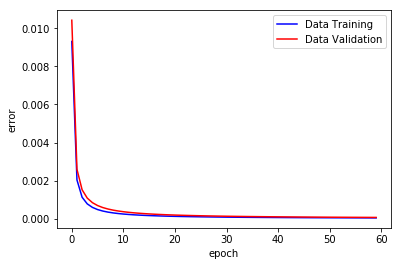

In [9]:
#Visualisations
import matplotlib.pyplot as plt

plt.plot((total_error_train3), color="blue")
plt.plot(total_error_val3, color= "red")
plt.legend(["Data Training", "Data Validation"])
plt.ylabel('error')
plt.xlabel('epoch')

plt.show()

In [10]:
accuracy = (1 - (total_error_val[59]/5)) * 100
print(accuracy,'%')

99.9951580635 %
